# 04. 모델 훈련
- - -

*이 장에서 언급하는 대부분의 주제는 신경망을 이해하고 구축하고 훈련시키는데 필수*<br>
<br>
**선형회귀 훈련법**
- 직접 계싼할 수 있는 공식 사용 => 훈련 세트에 가장 잘 맞는 모델 파라미터를 해석적으로 구함
- 경사 하강법(GD)을 이용하여 반복적 최적화를 통해 모델 파라미터를 변경하며 비용 함수를 훈련세트에 대해 최소화시킴

### 4.1 선형 회귀
(Ex) 삶의 만족도에 대한 간단한 선형 회귀 모델<br>
$$ 삶의 만족도 = \theta_0 + \theta_1\times{1인당 GDP}$$<br>
입력특성 **1인당 GDP**에 대한 선형 함수(모델 파라미터 = $\theta_0, \theta_1$)<br>
->> 즉, 선형 모델은 **입력 특성의 가중치 합**과 **편향(절편, bias)** 이라는 상수를 더해 예측<br><br>
**선형 회귀 모델의 예측** : $\hat{y} = \theta_0+\theta_1x_1+\theta_2x_2+\cdots+\theta_nx_n$<br><br>
**선형 회귀 모델의 예측(벡터 형태)** : $\hat{y} = h_0(x) = \theta\cdot{x}$
- $\theta$ = 편향$\theta_0$과 $\theta_1에서 \theta_n$까지의 특성 가중치를 담은 모델의 파라미터 벡터
- x = $x_0에서 x_n$까지 담은 샘플의 **특성 벡터**($x_0$는 항상 1)
- $\theta\cdot{x}$ = 벡터$\theta와 x$의 점곱 = $\theta_0x_0+\theta_1x_1+\cdots+\theta_nx_n$
- $h_\theta$는 모델 파라미터 $\theta$를 사용한 가설함수

모델 훈련 = 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터 설정<br>
이를 위해 모델이 훈련 데이터에 얼마나 잘 맞는지 측정 >> 이후 파라미터 조정<br>
선형 회귀 성능 측정 지표 = RMSE(평균 제곱근 오차) >> 오차를 최소화 하는 $\theta$ 찾기<br><br>
(+) 일반적으로 머신러닝에서 벡터 = 열 벡터<br>
$\theta와x$가 열 벡터라면, 예측은 $\hat{y} = \theta^Tx \Rightarrow$ 즉, 예측 결과는 스칼라 값이 아닌 하나의 원소를 가진 행렬 값 
<br><br>
**훈련 세트 X에 대한 선형 회귀 가설 $h_\theta$의 MES**
$$MES(X,h_\theta) = \frac{1}{m}\sum_{i=1}^{m}(\theta^Tx^{(i)} - y^{(i)})^2$$

### 4.1.1 정규방정식
**정규방정식** = 비용 함수를 최소화하는 $\theta$값을 찾기위한 해석적인 방법<br>
$\hat{\theta} = (X^TX)^{-1}X^Ty$
- $\hat{\theta}$ = 비용 함수를 최소화하는 $\theta$ 값
- y = $y^{(1)}부터 y^{(m)}$까지 포함하는 타깃 벡타

**정규방정식 구하기**<br><br>
$MES(X,h_\theta) = \frac{1}{m}\sum_{i=1}^{m}(\theta^Tx^{(i)} - y^{(i)})^2$<br>
$MES(X,h_\theta) = \frac{1}{m}(X\hat{\theta} - y^{(i)})^2\Rightarrow$ 시그마 행렬X(mxn행렬)로 표기, X행렬 표기에 따른 $\theta^T$(1xn행렬)를 $\hat{\theta}$(nx1행렬로) 치환<br>
$0 = \frac{2}{m}X^T(X\hat{\theta}-y)$ 최소값$\theta\Rightarrow$ 기울기0인 점을 구하기 위해 미분($X\hat{\theta}$ 상수 벡터 X의 역행렬)<br>
$X^Ty = X^TX\hat{\theta}$<br>
$\hat{\theta} = (X^TX)^{-1}X^Ty$

In [1]:
import numpy as np

X = 2 *np.random.rand(100,1) #0~1의 표준정규분포 난수를 100X1의 Matrix로 생성
y= 4 + 3*X + np.random.randn(100,1) #평균0,편차1의 가우시안 표준정규분포 난수를 100x1의 Matrix로 생성

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

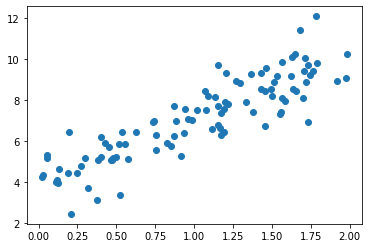

In [3]:
plt.scatter(X,y)
plt.show()
# 무작위로 생선한 선형 데이터 셋

*정규방정식을 이용해 $\hat{\theta}$ 값 계산*<br>
이 데이터를 생성하기 위해 사용한 함수는 $y = 4+3x_1+$가우시안 잡음

In [10]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
#넘파이 선형대수 모듈(np.linalg)에 inv() 함수를 동해 역행렬을 계산하고 dot()메서드를 사용해 행렬 곱셈

In [ ]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))


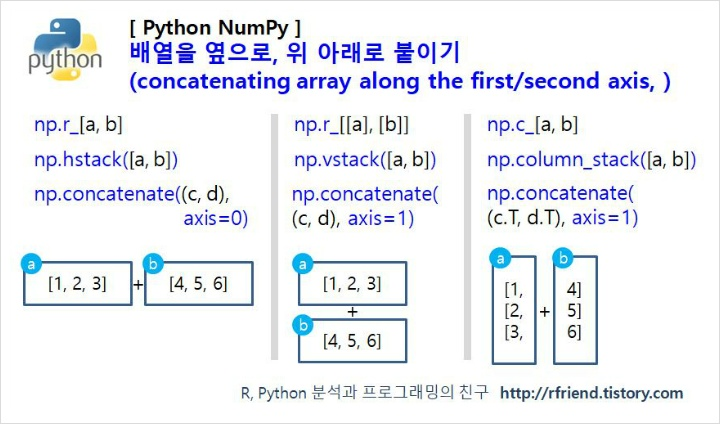

In [8]:
from IPython.display import Image
Image('npstack.jpg')

In [11]:
theta_best

array([[3.93939253],
       [3.12072389]])

y의 파라미터 기대값 : $\theta_0 = 4,\theta_1 = 3$ <br>
정규방정식의 예측값 : $\theta_0 = 3.939,\theta_1 = 3.121$<br>

**가우시안 잡음** 때문에 함수의 파라미터 정확하게 재현하지 못함

$\hat{y} = X\hat{\theta}$ **를 사용해서 예측**

In [12]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #모든 샘플에 x0 = 1을 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.93939253],
       [10.18084031]])

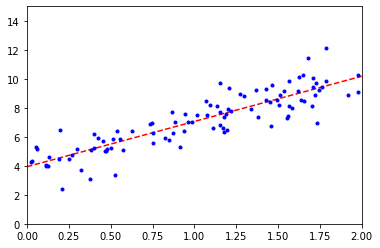

In [14]:
plt.plot(X_new, y_predict, "r--")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

**사이킷런의 선형회귀**

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_ #가중치(cef_), 편향(intercept_)

(array([3.93939253]), array([[3.12072389]]))

In [19]:
!git clone https://github.com/Note-YH/Hands-ON-ML-2nd-Edition.git 

Cloning into 'Hands-ON-ML-2nd-Edition'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 6), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (18/18), done.
